# Stroke Prediction

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Description

1) id: unique identifier
<br>
<br>
2) gender: "Male", "Female" or "Other"
<br>
<br>
3) age: age of the patient
<br>
<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
<br>
<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
<br>
<br>
6) ever_married: "No" or "Yes"
<br>
<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
<br>
<br>
8) Residence_type: "Rural" or "Urban"
<br>
<br>
9) avg_glucose_level: average glucose level in blood
<br>
<br>
10) bmi: body mass index
<br>
<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
<br>
<br>
12) stroke: 1 if the patient had a stroke or 0 if not
<br>
<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI is the only feature with missing values -- probably due to it not being recorded. This is easily dealt with through imputation

In [5]:
import matplotlib as plt
import seaborn as sns

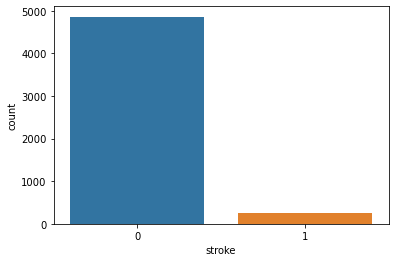

In [6]:
sns.countplot(x='stroke', data=df)

In [7]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

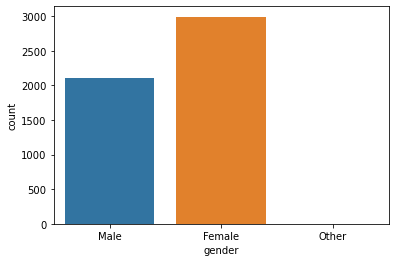

In [9]:
sns.countplot(x='gender', data=df)

In [10]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

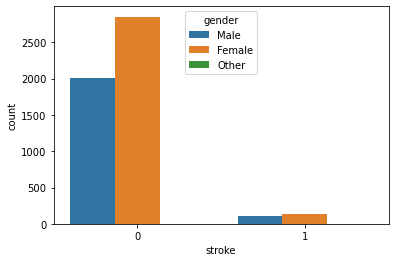

In [24]:
sns.countplot(x='stroke', hue='gender', data=df)

Since there's only one person that identified as "Other", it's hard to see whether they had a stroke or not.. 

In [28]:
df.loc[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


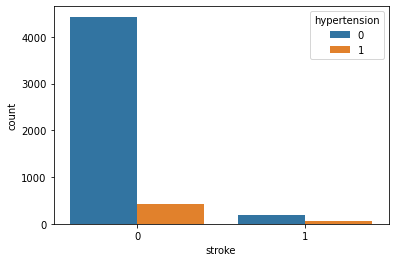

In [29]:
sns.countplot(x='stroke', hue='hypertension', data=df)

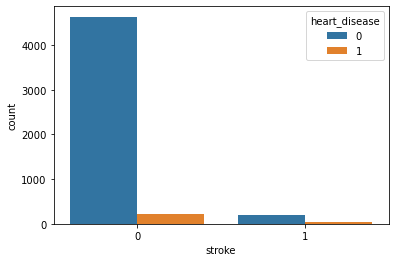

In [30]:
sns.countplot(x='stroke', hue='heart_disease', data=df)

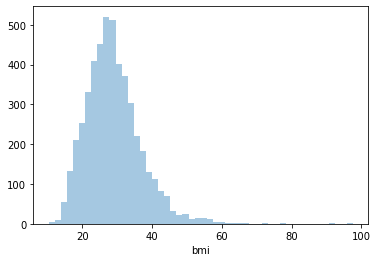

In [31]:
sns.distplot(df.bmi, kde=False)

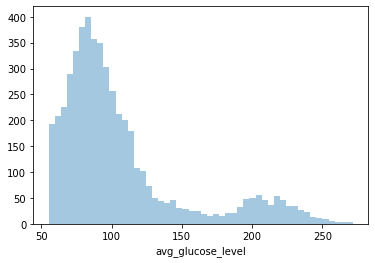

In [32]:
sns.distplot(df.avg_glucose_level, kde=False)